<a href="https://colab.research.google.com/github/anurag4667/Deep_learning/blob/main/stock_market_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import yfinance as yf

In [45]:
df = yf.download("AAPL", start="2017-01-01", end="2022-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [47]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.827246,26.868821,26.506197,26.746406,115127600
2017-01-04,26.797222,26.910399,26.734861,26.757958,84472400
2017-01-05,26.933496,26.991239,26.748719,26.774126,88774400
2017-01-06,27.233751,27.291494,26.901153,26.972753,127007600
2017-01-09,27.483204,27.584832,27.240686,27.242994,134247600


In [49]:
df2 = df.reset_index()['Close']
df2

Ticker,AAPL
0,26.827246
1,26.797222
2,26.933496
3,27.233751
4,27.483204
...,...
1254,176.996704
1255,175.975922
1256,176.064255
1257,174.906067


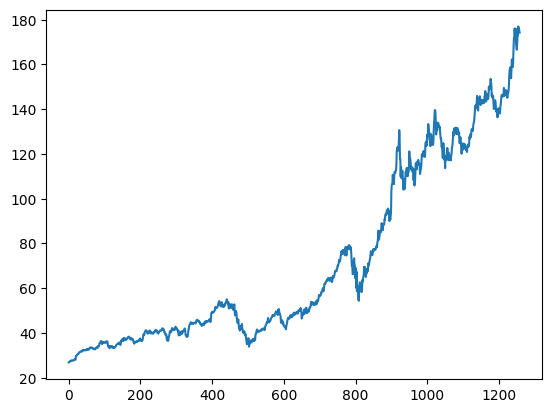

In [50]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [51]:
# lstm are sensitive to scale of the data

In [52]:
import numpy as np


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [54]:
df2

array([[1.99891334e-04],
       [0.00000000e+00],
       [9.07289000e-04],
       ...,
       [9.93791927e-01],
       [9.86080929e-01],
       [9.81964090e-01]])

In [57]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2),:1]

In [58]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [61]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
